# PCA- FACTOR ANALYSIS COVID 19

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
df= pd.read_csv('owid-covid-data.csv')
df.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
172188,SLB,Oceania,Solomon Islands,2020-11-04,13.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,35.890,1.4,73.00,0.567,NaN,NaN,NaN,NaN
20270,BEN,Africa,Benin,2021-01-12,3363.0,0.0,8.429,46.0,0.0,0.286,...,0.6,12.3,11.035,0.5,61.77,0.545,NaN,NaN,NaN,NaN
82627,OWID_HIC,NaN,High income,2021-09-26,97945455.0,131136.0,214085.571,1671926.0,925.0,2790.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119335,MHL,Oceania,Marshall Islands,2020-10-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,82.502,2.7,73.70,0.704,NaN,NaN,NaN,NaN
138456,OWID_NAM,NaN,North America,2020-03-08,656.0,146.0,82.857,21.0,4.0,2.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119284,MHL,Oceania,Marshall Islands,2020-08-18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,82.502,2.7,73.70,0.704,NaN,NaN,NaN,NaN
138092,NGA,Africa,Nigeria,2022-06-30,257290.0,332.0,82.714,3144.0,0.0,0.000,...,0.6,10.8,41.949,NaN,54.69,0.539,NaN,NaN,NaN,NaN
9676,ABW,North America,Aruba,2021-10-19,15746.0,14.0,11.857,170.0,0.0,0.000,...,NaN,NaN,NaN,NaN,76.29,NaN,NaN,NaN,NaN,NaN
50067,DNK,Europe,Denmark,2020-05-25,11387.0,27.0,59.857,563.0,1.0,2.143,...,19.3,18.8,NaN,2.5,80.90,0.940,NaN,NaN,NaN,NaN
81396,HTI,North America,Haiti,2020-12-11,9434.0,0.0,17.286,233.0,0.0,0.000,...,2.9,23.1,22.863,0.7,64.00,0.510,NaN,NaN,NaN,NaN


In [26]:
df.isna().sum()

iso_code                                        0
continent                                   12140
location                                        0
date                                            0
total_cases                                  8536
                                            ...  
human_development_index                     41869
excess_mortality_cumulative_absolute       203080
excess_mortality_cumulative                203080
excess_mortality                           203060
excess_mortality_cumulative_per_million    203080
Length: 67, dtype: int64

In [27]:
df=df.fillna(method="ffill")

In [28]:
df['new_deaths'].isna().sum()

28

In [29]:
df=df.dropna()

In [30]:
df['new_deaths'].isna().sum()

0

In [31]:
df.isna().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
                                          ..
human_development_index                    0
excess_mortality_cumulative_absolute       0
excess_mortality_cumulative                0
excess_mortality                           0
excess_mortality_cumulative_per_million    0
Length: 67, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172319 entries, 37894 to 210212
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    172319 non-null  object 
 1   continent                                   172319 non-null  object 
 2   location                                    172319 non-null  object 
 3   date                                        172319 non-null  object 
 4   total_cases                                 172319 non-null  float64
 5   new_cases                                   172319 non-null  float64
 6   new_cases_smoothed                          172319 non-null  float64
 7   total_deaths                                172319 non-null  float64
 8   new_deaths                                  172319 non-null  float64
 9   new_deaths_smoothed                         172319 non-null  float

# Set Variables and Compute PCA

In [33]:
arr = df[['new_cases', 'new_deaths']].values

# Standardize features by removing the mean and scaling to unit variance
# The results of PCA depend on the scaling of the variables. This can be 
# cured by scaling each feature by its standard deviation, so that one 
# ends up with dimensionless features with unital variance
arr = StandardScaler().fit_transform(arr)

In [34]:
pca = PCA(n_components=2)
pca.fit(arr)

PCA(n_components=2)

In [35]:
print(f'PCA Components: \n {pca.components_} \n')
print(f'PCA Explained Variance: \n {pca.explained_variance_} \n')
print(f'PCA Explained Variance Ratio: \n {pca.explained_variance_ratio_} \n')

PCA Components: 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]] 

PCA Explained Variance: 
 [1.64334268 0.35666893] 

PCA Explained Variance Ratio: 
 [0.82166657 0.17833343] 



(-2.336206030026048,
 45.41835476607771,
 -1.3888433334957937,
 24.819039927843267)

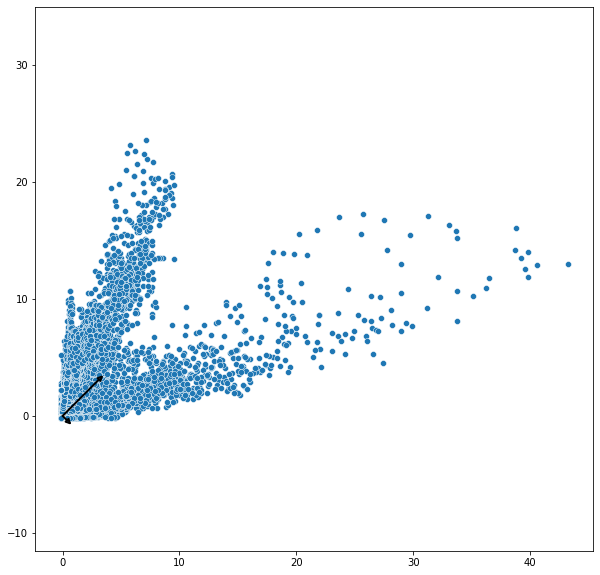

In [36]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(x=arr[:, 0], y=arr[:, 1])

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * length
    ax = plt.gca()
    ax.annotate('', pca.mean_ + v, pca.mean_, arrowprops=dict(arrowstyle='-|>',
                                                              linewidth=2,
                                                              shrinkA=0, 
                                                              shrinkB=0))
    
plt.axis('equal')

# FACTOR ANALYSIS

In [1]:
!pip install factor_analyzer==0.2.3

In [37]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [38]:
x = df[['female_smokers', 'male_smokers', 'handwashing_facilities','human_development_index','life_expectancy',
       'total_vaccinations','median_age','diabetes_prevalence']].values
df1 = df[['female_smokers', 'male_smokers', 'handwashing_facilities','human_development_index','life_expectancy',
       'total_vaccinations','median_age','diabetes_prevalence']]
df1.sample(10)

,female_smokers,male_smokers,handwashing_facilities,human_development_index,life_expectancy,total_vaccinations,median_age,diabetes_prevalence
198361,19.1,24.6,21.222,0.926,78.86,1.508939e+08,38.3,10.79
181617,18.8,18.9,67.779,0.945,82.80,1.333073e+07,41.0,4.79
132578,9.5,37.8,47.782,0.602,70.78,3.164250e+07,25.0,7.26
60227,0.4,8.5,7.960,0.485,66.60,7.463630e+05,19.8,7.47
167937,7.1,35.7,97.719,0.796,73.40,1.998500e+05,36.2,10.55
200720,19.1,24.6,21.222,0.926,80.58,5.158333e+09,42.2,12.26
193999,14.1,41.1,100.000,0.715,80.22,7.283700e+04,26.9,7.11
148179,23.5,48.8,59.607,0.555,64.50,8.538113e+06,22.6,17.65
137150,0.1,15.4,8.978,0.394,62.42,2.694418e+06,15.1,2.42
60411,0.4,8.5,7.960,0.485,66.60,3.184627e+06,19.8,7.47


In [39]:
from sklearn.decomposition import FactorAnalysis

factor = FactorAnalysis(n_components=3, random_state=42).fit(x)
print(pd.DataFrame(factor.components_, columns=['female_smokers', 
       'male_smokers', 'handwashing_facilities','human_development_index','life_expectancy',
       'total_vaccinations','median_age','diabetes_prevalence']))

   female_smokers  male_smokers  handwashing_facilities  \
0       -0.625335     -0.567540               -1.253079   
1        0.377417      2.781752               30.939074   
2        6.892742      8.883039               -0.044421   

   human_development_index  life_expectancy  total_vaccinations  median_age  \
0                -0.004508        -0.034212        9.041006e+08    0.081499   
1                 0.035618         2.101512        1.000517e-03    2.011358   
2                 0.080791         2.762286        4.764130e-06    5.100806   

   diabetes_prevalence  
0            -0.162750  
1             0.608836  
2             0.891955  


In [40]:
# Bartlett’s test of sphericity checks whether or not the observed variables 
# intercorrelate at all using the observed correlation matrix against the 
# identity matrix. If the test found statistically insignificant, you should 
# not employ a factor analysis.
chi_square_value, p_value = calculate_bartlett_sphericity(df1)
chi_square_value, p_value

(513058.4046440666, 0.0)

In [41]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor 
# analysis. It determines the adequacy for each observed variable and for the 
# complete model. KMO estimates the proportion of variance among all the 
# observed variable. Lower proportion id more suitable for factor analysis. 
# values range between 0 and 1. Value of KMO less than 0.6 is considered 
# inadequate.
kmo_all, kmo_model = calculate_kmo(df1)
kmo_model

0.7283181547566497

# Choosing the Number of Factors

In [42]:
fa = FactorAnalyzer()
fa.analyze(df1, 2, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,2.976931
1,1.255663
2,1.029870
3,0.979397
4,0.885940
5,0.508716
6,0.237085
7,0.126399


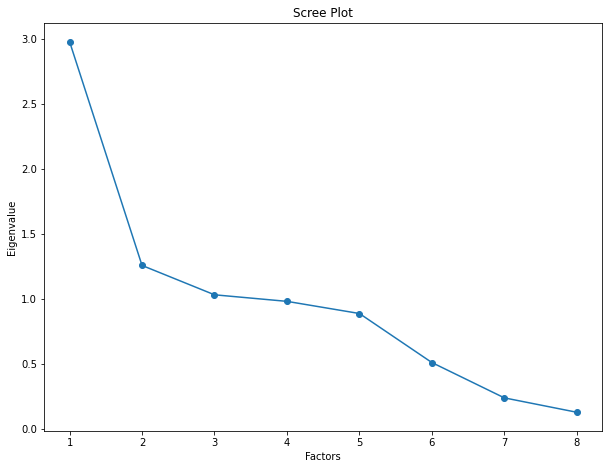

In [43]:
fig = plt.figure(figsize=(8,8))
plt.scatter(range(1, df1.shape[1] + 1), ev)
plt.plot(range(1, df1.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [44]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df1, 3, rotation="varimax")

fa.loadings

,Factor1,Factor2,Factor3
female_smokers,0.356595,0.511971,-0.099688
male_smokers,-0.010928,0.766819,0.209273
handwashing_facilities,0.145624,0.093441,0.596974
human_development_index,0.925872,0.137931,0.164589
life_expectancy,0.817543,-0.071910,0.293793
total_vaccinations,-0.000057,-0.064148,-0.044561
median_age,0.878877,0.188251,0.098846
diabetes_prevalence,0.116175,0.132469,0.179125


In [45]:
# Get variance of each factors
# Total xx% cumulative Variance explained by the 5 factors.
fa.get_factor_variance()

,Factor1,Factor2,Factor3
SS Loadings,2.460023,0.940154,0.567356
Proportion Var,0.307503,0.117519,0.070920
Cumulative Var,0.307503,0.425022,0.495942
